# GUC K-nearest neighbor Classification

### Import packages and data set
#### Import the "Classified data" file 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from sklearn.preprocessing import StandardScaler

In [2]:
df=pd.read_csv('Classified data', index_col=0)
df

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1
...,...,...,...,...,...,...,...,...,...,...,...
995,1.010953,1.034006,0.853116,0.622460,1.036610,0.586240,0.746811,0.319752,1.117340,1.348517,1
996,0.575529,0.955786,0.941835,0.792882,1.414277,1.269540,1.055928,0.713193,0.958684,1.663489,0
997,1.135470,0.982462,0.781905,0.916738,0.901031,0.884738,0.386802,0.389584,0.919191,1.385504,1
998,1.084894,0.861769,0.407158,0.665696,1.608612,0.943859,0.855806,1.061338,1.277456,1.188063,1


### Scale the features using sklearn.preprocessing package

**Instantiate a scaler standardizing estimator**

In [3]:
scaler=StandardScaler()

**Fit the features data only to this estimator (leaving the TARGET CLASS column) and transform**

In [4]:
scaler.fit(df.drop('TARGET CLASS',axis=1))
scaled_features = scaler.transform(df.drop('TARGET CLASS',axis=1))

In [5]:
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


### Train/Test split, model fit and prediction

In [6]:
from sklearn.model_selection import train_test_split
X = df_feat
y = df['TARGET CLASS']
X_train1, X_test, y_train1, y_test = train_test_split(scaled_features,df['TARGET CLASS'], test_size=0.2, random_state=101)


In [7]:
X_train, X_val, y_train, y_val = train_test_split(X_train1,y_train1, test_size=200, random_state=101)

In [8]:
X_train.shape

(600, 10)

In [9]:
X_train1.shape

(800, 10)

In [10]:
X_val.shape

(200, 10)

In [11]:
X_test.shape

(200, 10)

In [12]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [13]:
pred = knn.predict(X_test)

In [14]:
pred

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 1], dtype=int64)

In [15]:
#CALCULTING ACCURACY
from sklearn.metrics import accuracy_score,classification_report

# printing accuracy
print(accuracy_score(y_test,pred))
 
print(classification_report(y_test, pred))

0.925
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       106
           1       0.93      0.90      0.92        94

    accuracy                           0.93       200
   macro avg       0.93      0.92      0.92       200
weighted avg       0.93      0.93      0.92       200



### Evaluation of classification quality using Confusion Matrix

In [16]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, pred)
print(cm)

[[100   6]
 [  9  85]]


<AxesSubplot:>

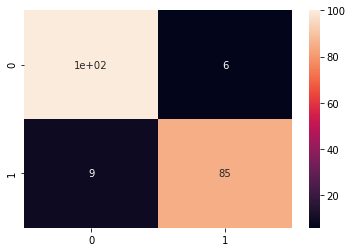

In [17]:
sns.heatmap(cm,annot=True)

***Print Misclassification error rate***

In [18]:
error_rate = np.mean(pred != y_test)
print(error_rate)

0.075


In [19]:
cm.sum()

200

In [20]:
error=1-((cm[0][0] + cm[1][1])/cm.sum())
error

0.07499999999999996

# Choosing 'k' using cross validation error
#### Plot the error rate vs. K Value

In [21]:
# since there's 1000 training sample, I will typically set k to be around sqrt of 1000 which is around 31 so k will range between 1 to 50

In [74]:
def cross_validate(X_train1, y_train1):
    error_rate_per_k = []
    errork=[]
    error_rangek=[]
    max_=[]
    min_=[]
    k=[]
    for i in range(1, 50, 2): #LOOP OVER DIFFERENT VALUES OF K
        error_rate_per_k = []
        k.append(i)
        for j in range(100): #NUMBER OF REPITITIONS
            X_train, X_val, y_train, y_val = train_test_split(X_train1,y_train1, test_size=200)
            knn = KNeighborsClassifier(n_neighbors = i)
            knn.fit(X_train, y_train)
            y_pred = knn.predict(X_val)
            error_rate_per_k.append(np.mean(y_pred != y_val))
        errork.append(np.sum(error_rate_per_k)/len(error_rate_per_k))
        #print(error_rate_per_k)
        max_.append(max(error_rate_per_k))
        min_.append(min(error_rate_per_k))
        #print(min_,max_)

    #print(errork)
    #print(min_)
    #print(max_)
    
    #print(error_rate_per_k)
    #print(errork)
    #print(error_rangek)
    
    position=np.argmin(errork, axis=0)
    #print(position)
    best_k=k[position]
    print("The best value for k is" , best_k)
    
  
    plt.figure(figsize =(20, 10))
    #plt.plot(k, errork, color ='blue',marker ='x',markerfacecolor ='blue', markersize = 5)
    plt.errorbar(k, errork, [min_,max_], marker='s', ms=5, mew=2, elinewidth=2, capsize=10)
    #plt.vlines(k, min_, max_, linestyles ="solid", colors ="b")
  
    plt.title('Error Rate vs. K Value')
    plt.xlabel('K')
    plt.ylabel('100-CV Error Rate')
    return(best_k)

The best value for k is 35


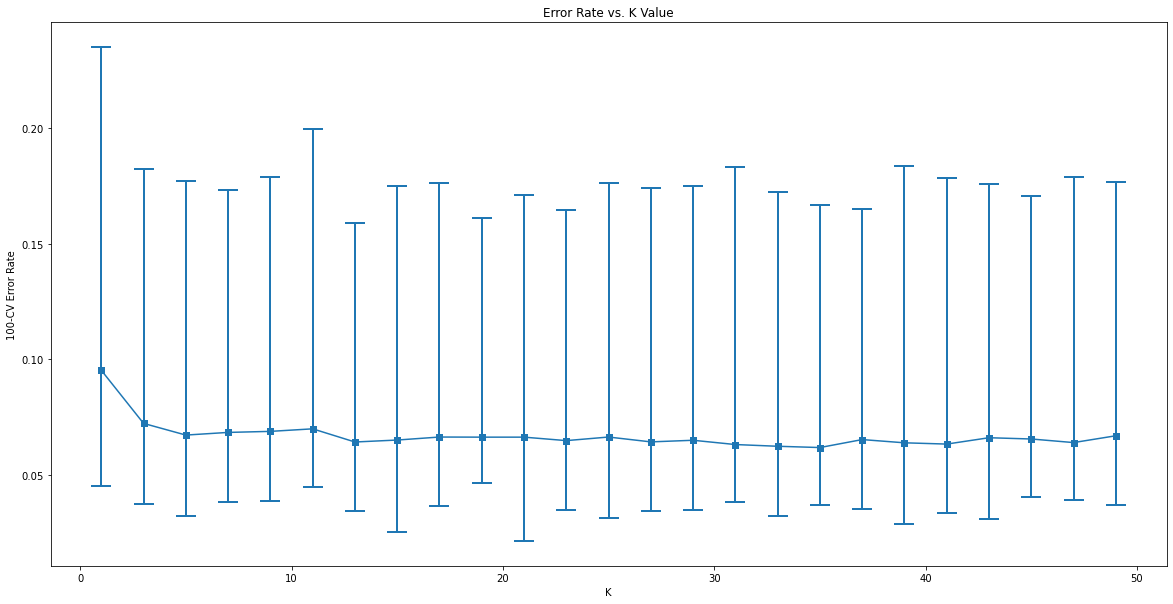

In [75]:
knn_best_k=cross_validate(X_train1,y_train1)

[[101   5]
 [  5  89]]


0.050000000000000044

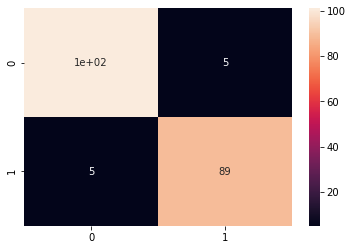

In [76]:
#TESTING
knn = KNeighborsClassifier(n_neighbors = knn_best_k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
sns.heatmap(cm,annot=True)
error_test=1-((cm[0][0] + cm[1][1])/cm.sum())
error_test